In [1]:
# DF = returnRawDFperBenchmark(Benchmark = "is", fix="Classes", benchmarkClass = ["A", "B", "C", "D"], FixedProcess = 64, Processes = [1,2,4,8,16,32,64,128,256], FixedBenchmarkClass="B")
# DF

In [2]:
# raw_x = DF.columns.tolist()
# functionName = "MPI_Irecv()"
# raw_y = [DF.at[functionName, x] for x in raw_x]

# # グラフのプロット
# fig = plt.figure(figsize=(12, 9))
# ## 実データをsklearn用に変形
# raw_x = np.array(raw_x).reshape(-1,1)
# raw_y = np.array(raw_y).reshape(-1, 1)
# ## 説明変数と目的変数に分割
# notTrain_x, train_x, target_x = raw_x[0], raw_x[1:-1], raw_x[-1]
# notTrain_y, train_y, target_y = raw_y[0], raw_y[1:-1], raw_y[-1]
# ## 実データをそれぞれプロット
# plt.scatter(train_x, train_y, marker="o", label="予測に用いた関数コール回数")
# plt.scatter(target_x, target_y, marker="o", label="予測したい関数コール回数の実測値")
# plt.scatter(notTrain_x, notTrain_y, marker="o", label="最初のデータを除外した時に予測に用いなかった関数コール回数")
# ## モデル式をプロットするために変数”plot_x”を用意する
# plot_x_min = 1.0
# plot_x_max = 256.0
# ### モデル式としてプロットする最低値の設定
# plot_x = np.linspace(plot_x_min, plot_x_max, 500)
# plot_x = np.array(plot_x).reshape(-1, 1)
# ## モデルを [1 - 1/n] として計算
# plot_y = 1 - 1/plot_x
# plt.plot(plot_x, plot_y)


# modelIpMk2 = ModelIp_mk2(train_x=train_x, train_y=train_y, target_x=target_x, target_y=target_y)
# modelIpMk2.calc_lr()
# plot_y = modelIpMk2.predict(plot_x)
# plt.plot(plot_x, plot_y)


In [3]:
# raw_x

# raw_y

# 多変数予測でのExtra-Pへの入力ファイルを作成する

In [4]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

In [5]:
benchmarkName = "cg"
fixed = "Process"
benchmarkClasses = ["A", "B", "C", "D"]
FixedProcess = 64
Processes = [1,2,4,8,16,32,64,128,256]
FixedBenchmarkClass = "B"

DF = collectFunctionNamesPerBenchmark(benchmarkName = "cg", benchmarkClasses = benchmarkClasses, processes = Processes)
# for benchmarkClass in benchmarkClasses:
#     for Process in Processes:
#         pass

DF

functionNames = DF["functionName"]
functionNames = tuple(functionNames)
functionNames

print(DF.query('functionName.str.endswith("VECSET")', engine='python'))

,functionName,call,benchmarkClass,benchmarkName,process
0,.TAU_application,1.0,1,cg,1
1,CG,1.0,1,cg,1
2,MPI_Finalize(),1.0,1,cg,1
3,INITIALIZE_MPI,1.0,1,cg,1
4,MPI_Init(),1.0,1,cg,1
...,...,...,...,...,...
17,MPI_Reduce(),1.0,256,cg,256
18,SETUP_SUBMATRIX_INFO,1.0,256,cg,256
19,MPI_Comm_size(),1.0,256,cg,256
20,MPI_Comm_rank(),1.0,256,cg,256


('.TAU_application',
 'CG',
 'MPI_Finalize()',
 'INITIALIZE_MPI',
 'MPI_Init()',
 'CONJ_GRAD',
 'MAKEA',
 'MPI_Wait()',
 'SPRNVC',
 'ICNVRT',
 'SPARSE',
 'MPI_Send()',
 'VECSET',
 'MPI_Irecv()',
 'MPI_Bcast()',
 'ALLOC_SPACE',
 'MPI_Barrier()',
 'MPI_Reduce()',
 'MPI_Comm_rank()',
 'SETUP_SUBMATRIX_INFO',
 'MPI_Comm_size()',
 'SETUP_PROC_INFO',
 '.TAU_application',
 'CG',
 'MPI_Finalize()',
 'INITIALIZE_MPI',
 'MPI_Init()',
 'CONJ_GRAD',
 'MAKEA',
 'MPI_Wait()',
 'SPRNVC',
 'ICNVRT',
 'SPARSE',
 'MPI_Send()',
 'VECSET',
 'MPI_Irecv()',
 'MPI_Bcast()',
 'ALLOC_SPACE',
 'MPI_Barrier()',
 'MPI_Reduce()',
 'SETUP_SUBMATRIX_INFO',
 'MPI_Comm_rank()',
 'MPI_Comm_size()',
 'SETUP_PROC_INFO',
 '.TAU_application',
 'CG',
 'MPI_Finalize()',
 'INITIALIZE_MPI',
 'MPI_Init()',
 'CONJ_GRAD',
 'MAKEA',
 'SPRNVC',
 'MPI_Wait()',
 'ICNVRT',
 'MPI_Send()',
 'SPARSE',
 'VECSET',
 'ALLOC_SPACE',
 'MPI_Irecv()',
 'MPI_Bcast()',
 'MPI_Barrier()',
 'MPI_Reduce()',
 'MPI_Comm_rank()',
 'MPI_Comm_size()',
 'SE

   functionName       call  benchmarkClass benchmarkName process
12       VECSET     7875.0               1            cg       1
12       VECSET     8750.0               1            cg       2
12       VECSET    10500.0               1            cg       4
12       VECSET    14000.0               1            cg       8
12       VECSET    14000.0               1            cg      16
11       VECSET    14000.0               1            cg      32
11       VECSET    14000.0               1            cg      64
11       VECSET    14000.0               1            cg     128
11       VECSET    14000.0               1            cg     256
12       VECSET    21625.0               4            cg       1
12       VECSET    29250.0               4            cg       2
12       VECSET    44500.0               4            cg       4
13       VECSET    75000.0               4            cg       8
13       VECSET    75000.0               4            cg      16
13       VECSET    75000.

# 既存のモデルが意図したとおりに実装できているかを確認する

In [6]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

In [7]:
plot_x = np.linspace(1, 30, 50, dtype=float)

### 対数モデル

In [8]:
# 対数モデルmk2
# ModelBaseを継承した対数モデルはどこかに不具合がある。
# ModelBase2を継承して、改修した対数モデルがこのモデル。

class ModelLog10_mk2(ModelBase2):

    def calc_lr(self):
        self.transformer_log10 = sp.FunctionTransformer(func=np.log10, inverse_func=inverter_log10_func)
        x_train_log10 = self.transformer_log10.transform(self.train_x)
        self.lr = LinearRegression()
        self.lr.fit(x_train_log10, self.train_y)

    def predict(self, num):
        numConverted = self.transformer_log10.transform(num)
        predicted = self.lr.predict(numConverted)
        return(predicted)
    
    def return_coef_(self):
        return self.lr.coef_
    
    def return_intercept_(self):
        return self.lr.intercept_

    def ModelName(self):
        return("ModelLog10_mk2")

# # 使用例
# modelLog10Mk2 = ModelIp_mk2(train_x=train_x, train_y=train_y, target_x=target_x, target_y=target_y)
# modelLog10Mk2.calc_lr()
# plot_y = modelLog10Mk2.predict(plot_x)

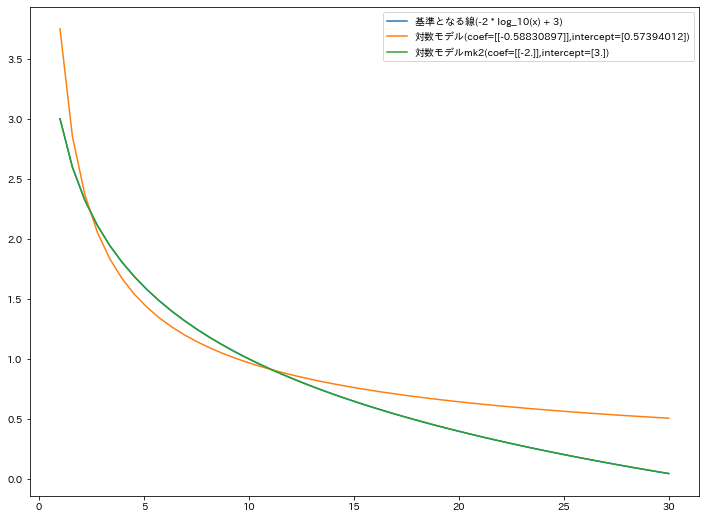

In [9]:
fig = plt.figure(figsize=(12, 9))
# y = -2 * log_10(x) + 3 でプロットする

plot_y_log10_baseLine = -2 * np.log10(plot_x) + 3
plt.plot(plot_x, plot_y_log10_baseLine, label="基準となる線(-2 * log_10(x) + 3)")

# 予測を実行してプロットする
## 作成したデータから学習用データ・テスト用データに切り分ける

train_x, target_x, train_y, target_y = plot_x[:-25], plot_x[-25:], plot_y_log10_baseLine[:-25], plot_y_log10_baseLine[-25:]

model_log10 = ModelLog10(
    train_x, train_y, test_ratio=0
)
plot_x = np.array(plot_x).reshape(-1, 1)
plot_y_log10 = np.array(plot_y_log10_baseLine).reshape(-1, 1)

model_log10.calc_lr()
plot_y_log10 = model_log10.predict(plot_x)
plt.plot(plot_x, plot_y_log10, label=f"対数モデル(coef={model_log10.return_coef_()},intercept={model_log10.return_intercept_()})")

# ModelBase2を継承した ModelLog10_mk2 を用いて予測・プロットする
model_log10mk2 = ModelLog10_mk2(train_x=train_x, train_y=train_y, target_x=target_x, target_y=target_y)
model_log10mk2.calc_lr()
plot_y_log10_mk2 = model_log10mk2.predict(plot_x)
plt.plot(plot_x, plot_y_log10_mk2, label=f"対数モデルmk2(coef={model_log10mk2.return_coef_()},intercept={model_log10mk2.return_intercept_()})")

plt.legend()

### 反比例モデル

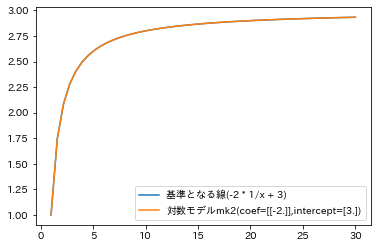

In [10]:
# y = -2 * (1/x) + 3 でプロットする

plot_y_ip_baseLine = -2 * (1/plot_x) + 3
plt.plot(plot_x, plot_y_ip_baseLine, label="基準となる線(-2 * 1/x + 3)")

# 予測を実行してプロットする
## 作成したデータから学習用データ・テスト用データに切り分ける

train_x, target_x, train_y, target_y = plot_x[:-25], plot_x[-25:], plot_y_ip_baseLine[:-25], plot_y_ip_baseLine[-25:]

plot_x = np.array(plot_x).reshape(-1, 1)
plot_y_ip = np.array(plot_y_ip_baseLine).reshape(-1, 1)

# ModelBase2を継承した ModelIp_mk2 を用いて予測・プロットする
model_ip_mk2 = ModelIp_mk2(train_x=train_x, train_y=train_y, target_x=target_x, target_y=target_y)
model_ip_mk2.calc_lr()
plot_y_ip_mk2 = model_ip_mk2.predict(plot_x)
plt.plot(plot_x, plot_y_ip_mk2, label=f"対数モデルmk2(coef={model_ip_mk2.return_coef_()},intercept={model_ip_mk2.return_intercept_()})")

plt.legend()